[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/yvsx48py)

# Estudio comparativo de algoritmos de clustering para la segmentación de clientes de un centro comercial

## Introducción

En este notebook, se realizará un estudio comparativo de algunos algoritmos de clustering para la segmentación de clientes de un centro comercial. El objetivo es encontrar el algoritmo que mejor segmente a los clientes de acuerdo a sus características.

**Los pasos a seguir para el desarrollo del notebook son los siguientes:**

1. Comprensión del problema
2. Análisis exploratorio de datos
3. Preprocesamiento de datos
4. Modelado
5. Evaluación de modelos
6. Conclusiones

**Los modelos a comparar son:**
- K-Means
- DBSCAN

## 1. Comprensión del problema

La primera etapa de cualquier proyecto de Machine Learning es comprender el problema que se quiere resolver. El objetivo es encontrar el algoritmo que mejor segmente a los clientes de acuerdo a sus características. Para ello, se utilizará el dataset [Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) de Kaggle.

Características del dataset:
- **CustomerID:** Identificador único del cliente
- **Gender:** Género del cliente
- **Age:** Edad del cliente
- **Annual Income (k$):** Ingresos anuales del cliente
- **Spending Score (1-100):** Puntuación asignada por el centro comercial en función del comportamiento del cliente y la naturaleza del gasto

De acuerdo a las características del dataset, se puede observar que se trata de un problema de clustering. El objetivo es encontrar grupos de clientes que compartan características similares. Por lo tanto, se utilizarán algoritmos de aprendizaje no supervisado para resolver el problema.

## 2. Análisis exploratorio de datos

En esta fase, se procede a realizar un análisis exploratorio de los datos para obtener una visión más profunda de la información disponible. Este paso es crucial para identificar patrones, tendencias y características que puedan afectar el rendimiento de los modelos de Machine Learning.

### Pasos Clave:

* **Carga de Datos**

Se cargarán los datos en un DataFrame de Pandas para su posterior análisis. Se utilizará la función `head()` para visualizar las primeras filas del conjunto de datos.

* **Información del Dataset**

Se utilizará la función `info()` para obtener información sobre el conjunto de datos, como el número de filas y columnas, el tipo de datos de cada variable y la cantidad de valores no nulos.

* **Estadísticas Descriptivas**

Se calcularán estadísticas descriptivas para cada variable, como medias, medianas, desviaciones estándar y cuartiles. Esto proporcionará una comprensión inicial de la distribución y la dispersión de los datos.

* **Visualización de Datos**

Se utilizarán gráficos y visualizaciones para representar las relaciones entre diferentes variables. Histogramas, diagramas de dispersión y boxplots ayudarán a identificar posibles correlaciones y outliers en el conjunto de datos. 


* **Correlación entre Variables**
  
Se analizará la correlación entre las variables para comprender las relaciones lineales potenciales. Esto es crucial para seleccionar las características más relevantes en fases posteriores.
 

**Resultados Esperados:**

- **Identificación de Tendencias:** Descubrimiento de patrones o tendencias notables en los datos.
- **Detección de Outliers:** Identificación de posibles valores atípicos que puedan afectar la precisión del modelo.
- **Entendimiento de Correlaciones:** Comprensión de las relaciones entre las variables y su relevancia para la predicción.
- **Selección de Características:** Identificación de las variables más influyentes para la predicción.

Este análisis exploratorio establecerá una base sólida para la siguiente fase, donde se realizará la preparación de los datos antes de la construcción y evaluación de modelos de Clustering.

### 2.1 Carga de Datos

En esta sección, se cargarán los datos en un DataFrame de Pandas para su posterior análisis. Se utilizará la función `head()` para visualizar las primeras filas del conjunto de datos.

In [1]:
# verificar si estamos en google colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [2]:
if IN_COLAB:
    # download a folder from github
    !wget -O datasets.zip https://github.com/DiegoPaezA/CienciaDatos-MASDI/archive/refs/heads/main.zip
    !unzip datasets.zip
    !mv CienciaDatos-MASDI-main/datasets datasets_github
    !rm -rf datasets.zip CienciaDatos-MASDI-main

In [3]:
import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.getcwd())

In [4]:
# Importamos la biblioteca pandas
import pandas as pd

# definimos la ruta del dataset a cargar
datasets_folder_name = 'content/datasets_github' if IN_COLAB else 'datasets'
ruta_dataset = os.path.join(dir_root, datasets_folder_name, 'clustering', 'Mall_Customers.csv')
# Cargamos el dataset
data = pd.read_csv(ruta_dataset)

# Mostramos las primeras 5 filas del dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploración de Datos

En esta sección, se procede a realizar un análisis exploratorio de los datos para obtener una visión más profunda de la información disponible.

### 2.2 Información del Dataset

Se utilizará la función `info()` para obtener información sobre el conjunto de datos, como el número de filas y columnas, el tipo de datos de cada variable y la cantidad de valores no nulos.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Adicionalmente, es posible obtener información sobre el número de valores null en cada columna utilizando la función `isnull()`.

In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Conclusiones:**

- El conjunto de datos contiene 200 filas y 5 columnas.
- No hay valores nulos en el conjunto de datos.
- La variable `Gender` es de tipo categórico.
- Las variables `Age`, `Annual Income (k$)` y `Spending Score (1-100)` son de tipo numérico.
- La variable `CustomerID` es de tipo numérico que representa un identificador único para cada cliente. Sin embargo, no es relevante para el análisis, por lo que se eliminará en la siguiente sección.


In [7]:
data.drop(['CustomerID'], axis=1, inplace=True)

### 2.3 Estadísticas Descriptivas

Se calcularán estadísticas descriptivas para cada variable, como medias, medianas, desviaciones estándar y cuartiles. Esto proporcionará una comprensión inicial de la distribución y la dispersión de los datos.

In [8]:
data.describe().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


**Conclusiones:**
- La edad media de los clientes es de 38 años, con una desviación estándar de 14 años.
- Los ingresos anuales medios de los clientes son de 60.56 k$, con una desviación estándar de 26.26 k$.
- La puntuación de gasto media de los clientes es de 50.2, con una desviación estándar de 25.82.
- La mayoría de los clientes tienen entre 28 y 49 años.
- La mayoría de los clientes tienen ingresos anuales entre 41 y 78 k$.
- La mayoría de los clientes tienen una puntuación de gasto entre 35 y 73.


### 2.4 Visualización de Datos

Se utilizarán gráficos y visualizaciones para representar las relaciones entre diferentes variables. Histogramas, diagramas de dispersión y boxplots ayudarán a identificar posibles correlaciones y outliers en el conjunto de datos.

- **Histogramas:** Se utilizarán histogramas para visualizar la distribución de las variables numéricas. Esto ayudará a identificar posibles outliers y a comprender la distribución de los datos.
- **Diagramas de Dispersión:** Se utilizarán diagramas de dispersión para visualizar la relación entre dos variables numéricas. Esto ayudará a identificar posibles correlaciones entre las variables.
- **Boxplots:** Se utilizarán boxplots para visualizar la distribución de las variables numéricas. Esto ayudará a identificar posibles outliers y a comprender la distribución de los datos.
- **Gráficos de Barras:** Se utilizarán gráficos de barras para visualizar la distribución de las variables categóricas. Esto ayudará a comprender la distribución de los datos.

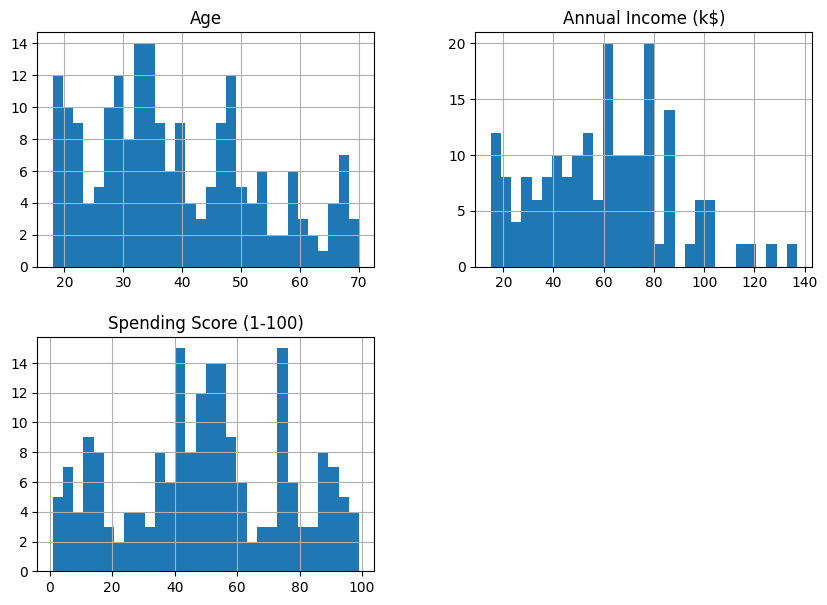

In [9]:
import matplotlib.pyplot as plt

# Histograma de las variables numéricas
data.hist(bins=30, figsize=(10,7))
plt.show()

**Conclusiones de los Histogramas:**

- La mayoría de los clientes tienen entre 28 y 49 años.
- La mayoría de los clientes tienen ingresos anuales entre 41 y 78 k$.
- La mayoría de los clientes tienen una puntuación de gasto entre 35 y 73.

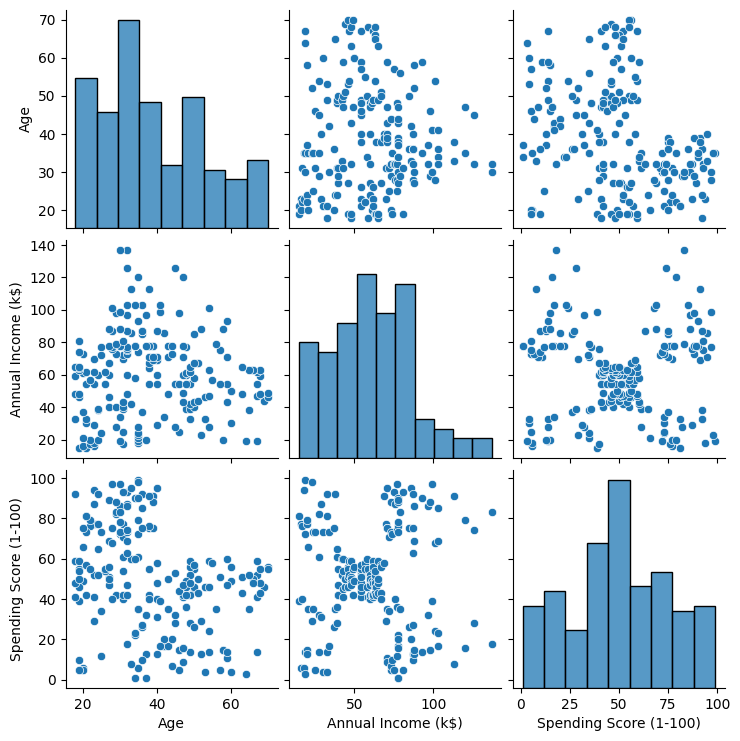

In [10]:
import seaborn as sns

# Asumiendo que 'data' es tu DataFrame
sns.pairplot(data)
plt.show()

**Conclusiones de los Diagramas de Dispersión:**
Con base en los diagramas de dispersión, no se observa una correlación clara entre las variables numéricas.

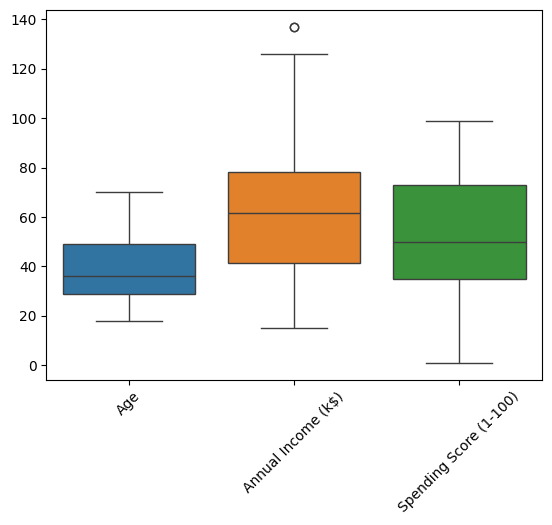

In [11]:
import seaborn as sns

sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

**Conclusiones de los Boxplots:**
- La distribución de la variable `Age` es aproximadamente simétrica, con una mediana de 36 años.
- La distribución de la variable `Annual Income (k$)` es aproximadamente simétrica, con una mediana de 61 k$.
- La distribución de la variable `Spending Score (1-100)` es aproximadamente simétrica, con una mediana de 50.
- No se observan outliers en ninguna de las variables numéricas.

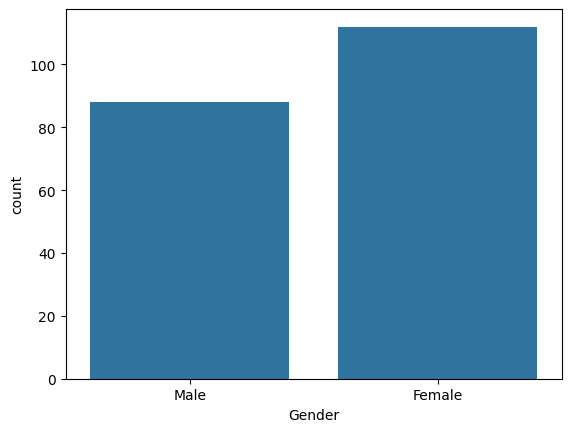

In [12]:
import seaborn as sns

sns.countplot(x='Gender', data=data)
plt.show()

La distribución de la variable `Gender` es uniforme, con 112 clientes de género masculino y 88 clientes de género femenino. Por lo tanto, no se observa un desbalanceo significativo en la variable categórica.

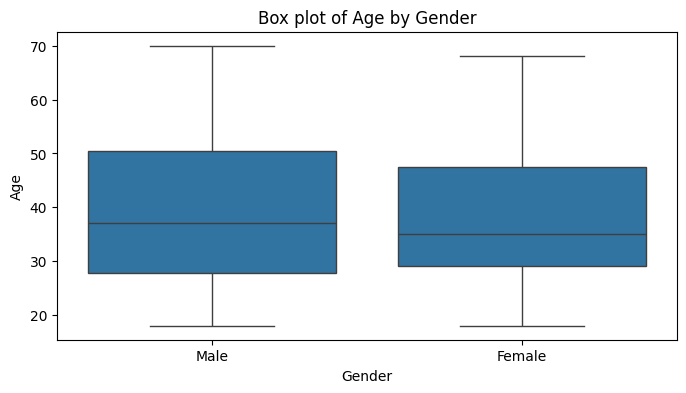

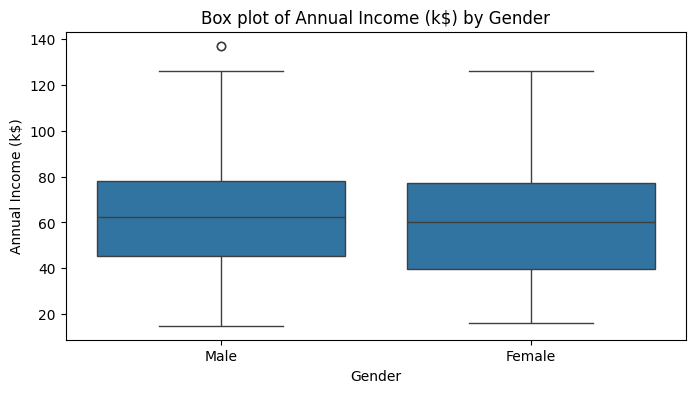

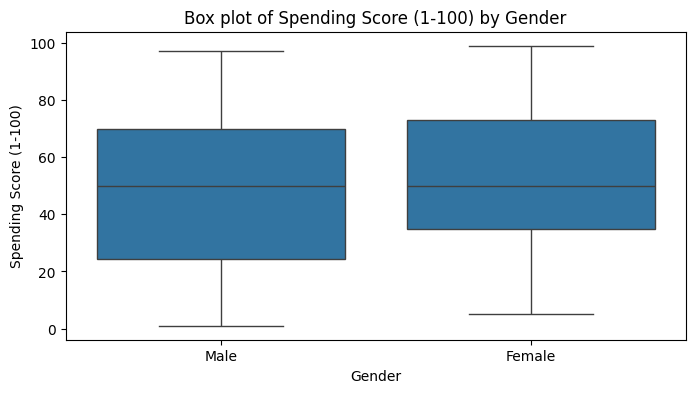

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = data.select_dtypes(include='object').columns.tolist()
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

for var in numerical_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Gender', y=var, data=data)
    plt.title('Box plot of ' + var + ' by Gender')
    plt.show()

**Conclusiones de los Gráficos de Boxplots:**

Al comparar las distribuciones de las variables numéricas por género, se observa que:

- Los clientes de género femenino tienden a ser más jóvenes que los clientes de género masculino.
- Los clientes de género femenino tienden a tener ingresos anuales más bajos que los clientes de género masculino.
- Los clientes de género femenino tienden a tener una puntuación de gasto más alta que los clientes de género masculino.

### 2.5 Correlación entre Variables

Se analizará la correlación entre las variables para comprender las relaciones lineales potenciales. Esto es crucial para seleccionar las características más relevantes en fases posteriores.

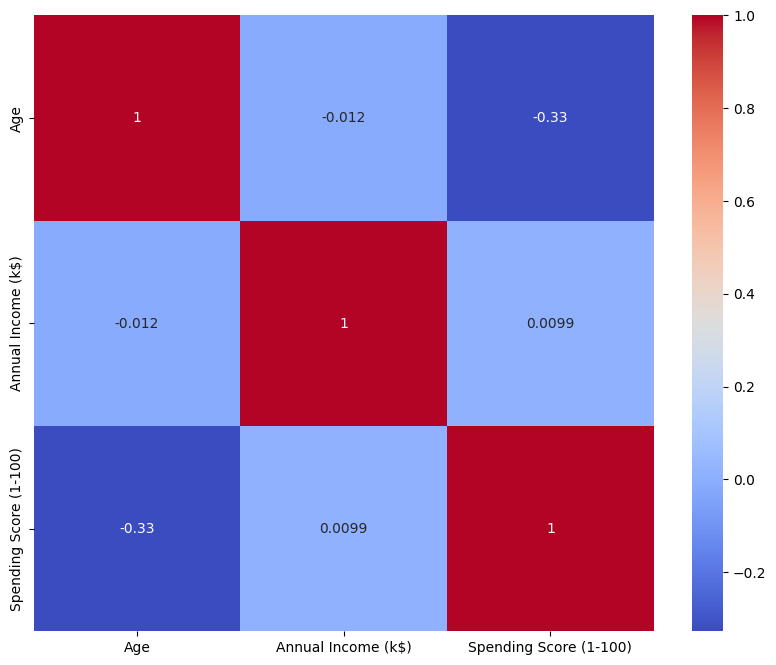

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = data.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

**Conclusiones de la Correlación:**

- No se observa una correlación clara entre las variables numéricas.

### 2.6 Conclusiones de la Exploración de Datos

- El conjunto de datos contiene 200 filas y 5 columnas.
- No hay valores nulos en el conjunto de datos.
- La variable `Gender` es de tipo categórico. Podría pensarse que se podría convertir a binario, pero no tiene sentido ya que dentro de los algoritmos de clustering no es recomendable utilizar variables categóricas. [Ver más](https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided)
- Dada la naturaleza de los algorithmos de clustering, no es necesario normalizar los datos, ya que estos algoritmos no se ven afectados por la escala de los datos.

## 3. Preprocesamiento de Datos

En esta sección, se realizará el preprocesamiento de los datos para prepararlos para la construcción de modelos de Clustering.

De acuerdo a los resultados del análisis exploratorio de datos, se eliminará la variable `CustomerID` ya que no es relevante para el análisis. Adicionalmente, se eliminará la variable `Gender` ya que los algoritmos de clustering no son afectados por variables categóricas. 

De esta forma, el conjunto de datos final contiene 200 filas y 3 columnas. Las cuales son las variables `Age`, `Annual Income (k$)` y `Spending Score (1-100)`.

- Se buscará la cantidad óptima de clusters utilizando el método del codo, para así poder definir el valor de `k` para el algoritmo K-Means.

In [15]:
# Datos de entrenamiento
X_data = data.select_dtypes(include=['int64', 'float64'])
X_data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### 3.1 Apliación del método del codo

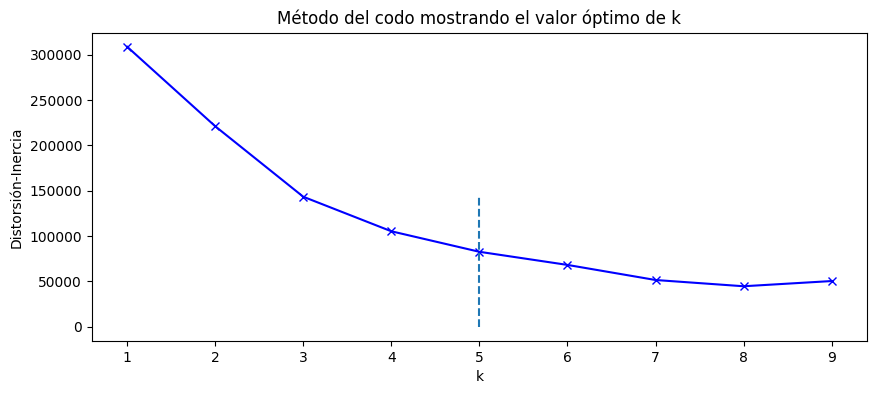

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Asumiendo que 'X_data' es tu DataFrame
# Método del codo - Cada vez que se ejecute este código, el valor de k puede cambiar
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.vlines(x=K[4], ymin=0, ymax=distortions[2], linestyles='--')
plt.xlabel('k')
plt.ylabel('Distorsión-Inercia')
plt.title('Método del codo mostrando el valor óptimo de k')
plt.show()

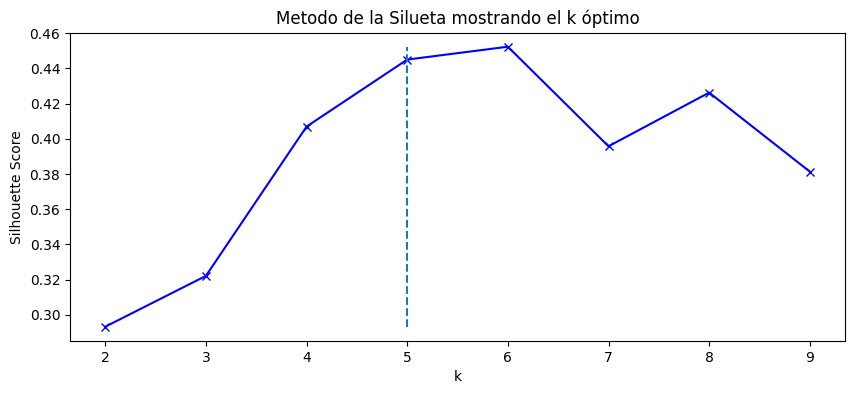

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
K = range(2,10)  # El puntaje de la silueta no está definido para k=1
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_data)
    silhouette_scores.append(silhouette_score(X_data, kmeanModel.labels_))

plt.figure(figsize=(10,4))
plt.plot(K, silhouette_scores, 'bx-')
# plot vertical line at k=5
plt.vlines(x=K[3], ymin=silhouette_scores[0], ymax=silhouette_scores[4], linestyles='--')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Metodo de la Silueta mostrando el k óptimo')
plt.show()

**Conclusiones del método del codo:**

Se aplicaron dos métodos para encontrar el número óptimo de clusters. El método del codo y el método de la silueta. Ambos métodos sugieren que el número óptimo de clusters es 5.

- En el método del codo, se observa que la inercia disminuye significativamente hasta 5 clusters, y luego disminuye de forma más gradual. Por lo tanto, se seleccionará 5 como el número óptimo de clusters. Se podría considerar tambien 6 clusters, pero se seleccionará 5 para evitar clusters muy pequeños.

- En el método del puntaje de silueta en función del número de clusters, se observa los puntajes mas altos cuando el número de clusters es 5 y 6. Sin embargo, se seleccionará 5 como el número óptimo de clusters.

## 4. Modelado

En esta sección, se construirán y entrenarán los modelos de Clustering. 

Se utilizarán los siguientes algoritmos:

- K-Means
- DBSCAN

### 4.1 K-Means

In [18]:
from sklearn.cluster import KMeans

# KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_data)
kmeans_labels = kmeans.labels_

KM5_Clust = X_data.copy()
KM5_Clust['Cluster'] = kmeans_labels
KM5_Clust.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [19]:
X_data.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

### Visualización de los Clusters encontrados por K-Means

**observaciones:** El resultado del entrenamiento de kmeans es una matriz de número de clusters x número de features, donde cada valor representa el centroide de cada cluster en cada feature.

Por lo tanto para visualizar los centroides se debe usar la posición de las columnas en el DataFrame para obtener las coordenadas de los centroides en esas dos características seleccionadas.

Por Ejemplo, Age es la columna 0 y Spending Score es la columna 1. (en python se empieza a contar desde 0)

Por lo tanto, para visualizar los centroides en esas dos características se debe usar:

```python
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
```

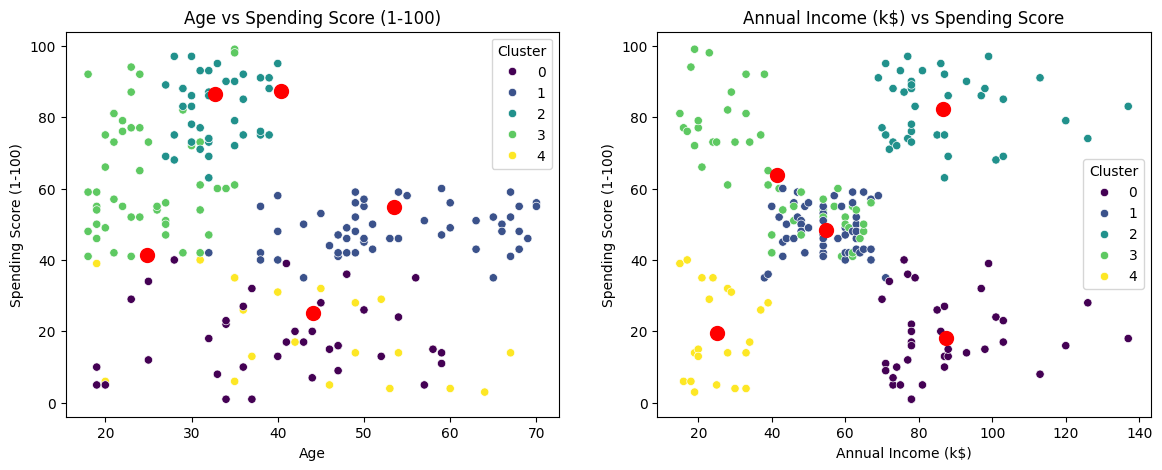

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 5))

# Gráfico de Age vs Spending Score
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=KM5_Clust, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=100, c='red')
plt.title('Age vs Spending Score (1-100)')

# Gráfico de Annual Income vs Spending Score
plt.subplot(1, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=KM5_Clust, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='red')
plt.title('Annual Income (k$) vs Spending Score')

plt.show()

**Conclusiones de los Clusters Encontrados por K-Means:**


Relación entre las variables `Age` y `Spending Score (1-100)`:

Se observa que no hay clusters claros en la relación entre las variables `Age` y `Spending Score (1-100)`.
Sin embargo, se puede observar que los clientes más jóvenes (20-40 años) tienden a tener una puntuación de gasto más alta, cluster 3 y 4.

Relación entre las variables `Annual Income (k$)` y `Spending Score (1-100)`:

- Cluster 0: Clientes con ingresos bajos y puntuación de gasto baja.
- Cluster 1: Clientes con ingresos medios y puntuación de gasto media.
- Cluster 2: Clientes con ingresos bajos y puntuación de gasto alta.
- Cluster 3: Clientes con ingresos altos y puntuación de gasto alta.
- Cluster 4: Clientes con ingresos altos y puntuación de gasto baja.



In [21]:
# Tamaño de cada cluster
cluster_sizes = KM5_Clust['Cluster'].value_counts()
print(cluster_sizes)

Cluster
1    53
3    50
2    39
0    37
4    21
Name: count, dtype: int64


In [22]:
import plotly.express as px

fig = px.scatter_3d(KM5_Clust, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster')

fig.update_layout(title='KMeans Clusters (3D)')
fig.show()

### Métricas de Evaluación K-Means

- **Coeficiente de silueta**: Esta métrica evalúa cuán cerca están los puntos en un cluster a los puntos en los clusters vecinos. Los valores van de -1 a 1, donde un valor alto indica que los puntos están bien agrupados.

- **Índice de Davies-Bouldin**: Esta métrica evalúa la media de las similitudes entre cada cluster con su cluster más similar, donde la similitud es la relación entre las distancias dentro del cluster y las distancias entre los clusters. Los valores más bajos indican una mejor partición. Tiene un rango de 0 a infinito.

In [23]:
from sklearn import metrics

# Coeficiente de silueta
silhouette_score = metrics.silhouette_score(X_data, kmeans_labels)
print(f'Silhouette Score: {round(silhouette_score, 3)}')

# Índice de Davies-Bouldin
davies_bouldin_score = metrics.davies_bouldin_score(X_data, kmeans_labels)
print(f'Davies Bouldin Score: {round(davies_bouldin_score, 3)}')

Silhouette Score: 0.427
Davies Bouldin Score: 0.87


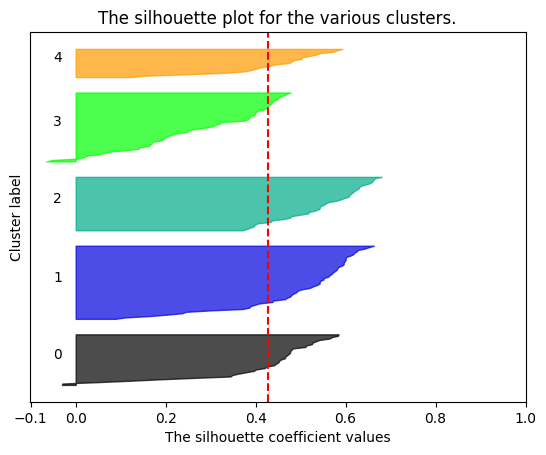

In [24]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np


silhouette_values = silhouette_samples(X_data, kmeans_labels)

fig, ax = plt.subplots(1, 1)
y_lower = 10
for i in range(kmeans.n_clusters):
    ith_cluster_silhouette_values = silhouette_values[kmeans_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / kmeans.n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax.set_title("The silhouette plot for the various clusters.")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")

ax.axvline(x=silhouette_score, color="red", linestyle="--")

ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

**Conclusiones de las Métricas de Evaluación:**

**Coeficiente de Silueta**: Es una métrica que mide qué tan bien agrupado está un objeto dentro de su propio cluster comparado con otros clusters. Valores cercanos a 1 indican una buena agrupación, mientras que valores cercanos a 0 sugieren solapamiento con otros clusters. Valores negativos implican que el objeto podría estar mal asignado.

**Longitud de las Barras:**

- Barras Largas: Un coeficiente de silueta alto (barras largas) indica que los puntos dentro del cluster están bien agrupados y claramente separados de otros clusters.
- Barras Cortas: Un coeficiente bajo (barras cortas) muestra que los puntos no se diferencian bien entre su propio cluster y otros, sugiriendo posibles problemas de agrupamiento.

**Interpretación del Gráfico:**

- Si la mayoría de los valores de silueta son positivos y altos, los clusters están bien definidos y separados.
- Clusters Desiguales: Si algunos clusters tienen barras más cortas en promedio o valores negativos, puede indicar solapamiento o mala definición de esos clusters.
- Tamaño Relativo de Clusters: También se puede observar la cantidad de elementos en cada cluster (representado por el ancho del área de color), lo que puede dar información sobre el equilibrio del agrupamiento.
  
**Observaciones de la Figura:**
- Los clusters 3 y 1 parecen tener barras largas, lo que indica buena cohesión interna y separación clara de otros clusters.
- Los clusters con barras más cortas podrían tener datos que no se agrupan tan bien, o podrían estar más cerca de otros clusters, lo que indica menos cohesión.
- La línea roja indica el promedio general del coeficiente de silueta para todos los clusters. Valores por encima de esta línea muestran un agrupamiento por encima del promedio, mientras que valores por debajo pueden sugerir problemas.

### 4.2 DBSCAN

Dado que el algoritmo DBSCAN no requiere definir el número de clusters, se evaluarán diferentes valores para los parámetros `eps` y `min_samples` para encontrar la combinación que mejor segmente a los clientes.

**Observaciones**:

Para definir los rangos a explorar para los parámetros `eps` y `min_samples`, se puede utilizar la gráfica de distancias al vecino más cercano. Esta gráfica muestra la distancia al vecino más cercano de cada punto, ordenados de forma ascendente. 

La gráfica de distancias al vecino más cercano ayuda a seleccionar el parámetro `eps` en DBSCAN. Por ejemplo, en el siguiente grafico, el "codo" o cambio en la pendiente ocurre aproximadamente entre 10 y 20 en el eje y. Este punto sugiere que un valor adecuado para `eps` podría estar en ese rango.

El parámetro `min_samples` en DBSCAN define el número mínimo de puntos necesarios para considerar una región como un cluster. Generalmente, su valor depende de la estructura esperada de los datos:

1. **Valores bajos (e.g., 3-5)**: Son útiles si se esperan clusters pequeños y densos, ya que requieren menos puntos cercanos para formar un cluster.
2. **Valores moderados (e.g., 5-10)**: Funcionan bien en datasets donde los clusters tienen un tamaño moderado y se desea evitar que puntos aislados formen clusters.
3. **Valores altos**: Se utilizan en datos muy densos y con grandes clusters, donde se necesita una gran cantidad de puntos para definir un cluster.

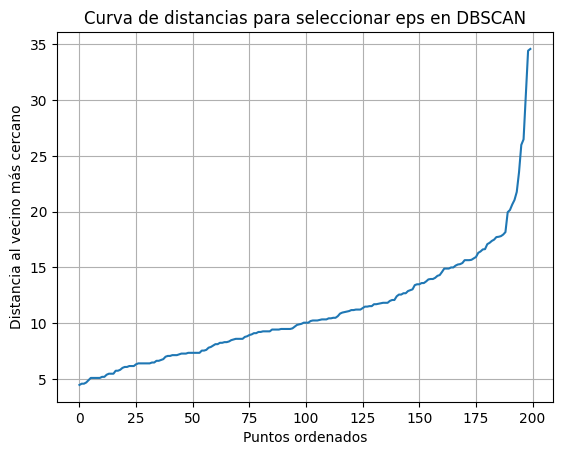

In [45]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Calcular las distancias al vecino más cercano
neighbors = NearestNeighbors(n_neighbors=5)  # Usa el mismo valor que planeas para `min_samples`
neighbors_fit = neighbors.fit(X_data)
distances, indices = neighbors_fit.kneighbors(X_data)

# Ordenar las distancias de menor a mayor
distances = np.sort(distances[:, 4], axis=0)



# Graficar la curva de distancias y marcar el punto de cambio
plt.plot(distances)
plt.title("Curva de distancias para seleccionar eps en DBSCAN")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al vecino más cercano")
plt.grid()
plt.show()


In [63]:
from sklearn.cluster import DBSCAN
from itertools import product

eps_values = np.arange(8, 20, 0.25)
min_samples_values = np.arange(3, 10)

DBSCAN_params = list(product(eps_values, min_samples_values))

In [64]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_data)
    labels = DBS_clustering.labels_
    num_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)  # Exclude noise label (-1) from cluster count
    no_of_clusters.append(num_clusters)
    
    # Calculate silhouette score only if there is more than one cluster
    if num_clusters > 1:
        sil_score.append(silhouette_score(X_data, labels))
    else:
        sil_score.append(float('nan'))  # Use NaN or a placeholder for single-cluster cases

**Interpretación de la Figura:**

Los parámetros `eps` y `min_samples` son críticos para el rendimiento de DBSCAN. `eps` define la distancia máxima entre dos muestras para que una sea considerada en el vecindario de la otra, y `min_samples` establece el número mínimo de muestras en un vecindario para que un punto sea considerado un punto central.

La siguiente figura es un mapa de calor (heatmap) que muestra la relación entre los parámetros de DBSCAN (Eps y Min_samples) y el número de clusters resultantes.


**Colores del Mapa de Calor:**

- Los colores indican el número de clusters encontrados para cada combinación de valores de Eps y Min_samples.
- Los colores más claros (en una escala de azul a verde, según el cmap YlGnBu) representan mayor número de clusters, mientras que los colores más oscuros representan menos clusters.
- Los valores anotados en cada celda indican el número exacto de clusters resultantes de cada combinación de parámetros.

**Conclusiones Potenciales:**

- El mapa de calor permite observar cómo diferentes combinaciones de Eps y Min_samples afectan el número de clusters. Por ejemplo:
  - Bajo Eps y bajo Min_samples pueden dar lugar a más clusters, lo que sugiere que el algoritmo está identificando muchos grupos pequeños.
  - Alto Eps y alto Min_samples pueden reducir el número de clusters, ya que se requiere más densidad para formar un cluster y el radio de alcance es amplio.
- Esto puede ayudar a elegir la combinación óptima de parámetros para DBSCAN, donde el número de clusters es razonable para el análisis deseado.

**Uso de esta Visualización:**

- Optimización de Parámetros: El heatmap permite explorar cómo los cambios en Eps y Min_samples afectan el número de clusters sin tener que probar cada combinación individualmente. Esto facilita encontrar la configuración adecuada para el agrupamiento.
- Comprensión de la Sensibilidad: Puedes ver qué parámetros son más sensibles, identificando cómo pequeños cambios en Eps o Min_samples alteran el resultado.

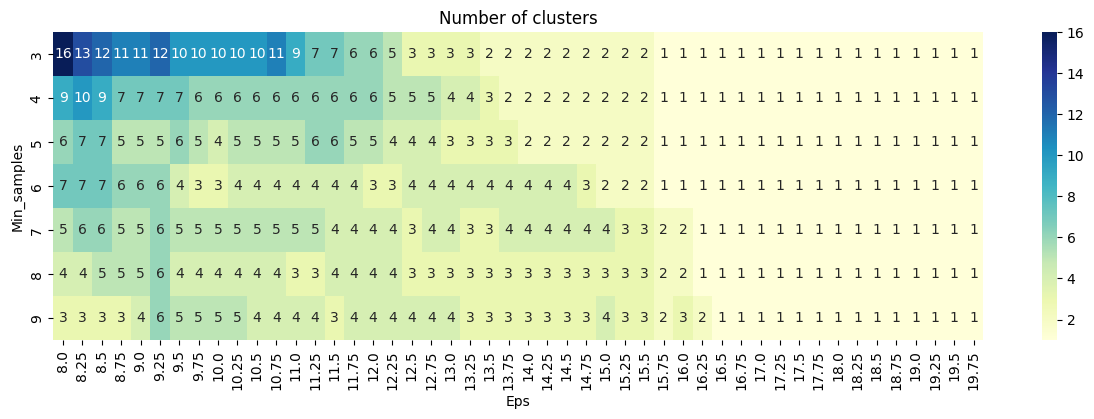

In [65]:
# Visualizar relación entre parámetros y número de clusters
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(15,4))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

El gráfico de calor anterior muestra que el número de clusters varía entre 17 y 4. Sin embargo, la mayoría de las combinaciones ofrecen entre 4 y 7 clusters. Para decidir qué combinación elegir, se utilizará la metrica de evaluación `Silhouette Score`.

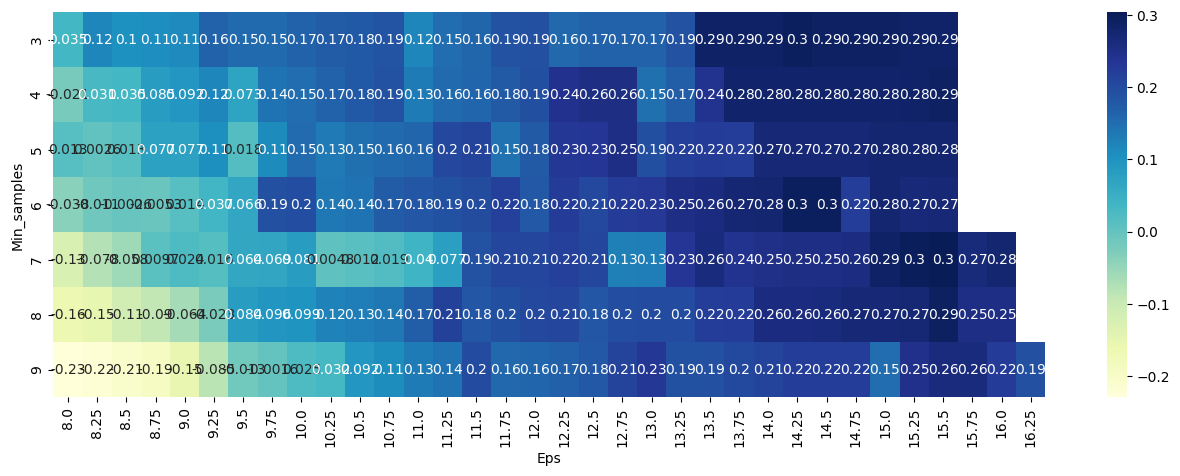

In [66]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(16,5))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [67]:
# encontrar el valor maximo de silueta en el dataframe pivot_1
max_sil_score = pivot_1.max().max()
print(f'Maximum Silhouette Score: {round(max_sil_score, 3)}')
print(f'Optimal parameters eps: {pivot_1.max().idxmax()}')
print(f'Min Samples: {pivot_1.idxmax()[pivot_1.max().idxmax()]}')

Maximum Silhouette Score: 0.304
Optimal parameters eps: 15.5
Min Samples: 7


In [61]:
from sklearn.cluster import DBSCAN

# Asumiendo que 'X_data' son tus datos
dbscan = DBSCAN(eps=15.5, min_samples=7)
dbscan_labels = dbscan.fit_predict(X_data)

DBSCAN_Clust = X_data.copy()
DBSCAN_Clust['Cluster'] = dbscan_labels

print(f'Number of clusters found: {len(np.unique(dbscan_labels))}')

Number of clusters found: 4


In [62]:
# tamaño de cada cluster
cluster_sizes = DBSCAN_Clust['Cluster'].value_counts()
cluster_sizes

Cluster
 0    123
 1     34
 2     27
-1     16
Name: count, dtype: int64

DBSCAN creó 3 clusters y un cluster adicional para los outliers (-1)

### Visualización de los Clusters Encontrados por DBSCAN

In [ ]:
plt.figure(figsize=(12, 5))

# Gráfico de Age vs Spending Score
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=DBSCAN_Clust, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.title('Age vs Spending Score (1-100)')

# Gráfico de Annual Income vs Spending Score
plt.subplot(1, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=DBSCAN_Clust, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='red')
plt.title('Annual Income (k$) vs Spending Score')

plt.show()

### Métricas de Evaluación DBSCAN


In [ ]:
from sklearn import metrics

# Coeficiente de silueta
silhouette_score = metrics.silhouette_score(X_data, dbscan_labels)
print(f'Silhouette Score: {round(silhouette_score, 3)}')

# Índice de Davies-Bouldin
davies_bouldin_score = metrics.davies_bouldin_score(X_data, dbscan_labels)
print(f'Davies Bouldin Score: {round(davies_bouldin_score, 3)}')

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np

silhouette_values = silhouette_samples(X_data, dbscan_labels)

fig, ax = plt.subplots(1, 1)
y_lower = 10
for i in range(len(np.unique(dbscan_labels))):
    ith_cluster_silhouette_values = silhouette_values[dbscan_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / len(np.unique(dbscan_labels)))
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax.set_title("The silhouette plot for the various clusters.")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")

ax.axvline(x=silhouette_score, color="red", linestyle="--")

ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

**Conclusiones de los Clusters Encontrados por DBSCAN:**

Tomando como referencia las métricas de evaluación y la visualización de los clusters, se puede concluir que el algoritmo DBSCAN no es el más adecuado para este problema. Esto se debe a que el algoritmo DBSCAN trata de encontrar clusters de densidad alta, y en este caso los clusters no son de densidad alta.

*Interpretación Índice de Davies-Bouldin:*

- Valores bajos del índice indican que los clusters son compactos y bien separados, lo que refleja un buen agrupamiento.
- Valores altos sugieren que los clusters se solapan o están muy dispersos, lo que indica un agrupamiento de menor calidad.

*Interpretación del Coeficiente de Silueta:*

- Valores cercanos a 1 indican una buena agrupación, donde los puntos están bien separados de otros clusters.
- Valores cercanos a 0 sugieren solapamiento con otros clusters.

## 6. Conclusiones

En este notebook, se realizó un estudio comparativo de algunos algoritmos de clustering para la segmentación de clientes de un centro comercial. El objetivo fue encontrar el algoritmo que mejor segmente a los clientes de acuerdo a sus características.

**Los resultados obtenidos fueron los siguientes:**

- **Número de clusters**: 
  - K-Means encontró 5 clusters, mientras que DBSCAN identificó 5 clusters y un cluster adicional para los outliers (-1).
- **Coeficiente de Silueta**: 
  - K-Means obtuvo un valor de 0.44, indicando clusters más compactos, mientras que DBSCAN logró 0.26, sugiriendo menos cohesión interna.
- **Índice de Davies-Bouldin**: 
  - K-Means tuvo un valor de 0.822, lo que refleja clusters más separados y definidos, comparado con 2.237 de DBSCAN, que indica una menor separación entre clusters.
- **Interpretabilidad**: 
  - Los clusters generados por K-Means resultaron ser más claros y fáciles de interpretar en comparación con los obtenidos por DBSCAN.